In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("D:\EDA and Feature Engineering projects")

<h2>Tasks to perform</h2>
<h4>Problem Statement: </h4><p>The purchase column is the Target Variable, perform Univariate Analysis & Bivariate Analysis w.r.t the Purchase. Masked in the column description means already converted from categorical value to numerical column. Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.</p>

Data Collecting
---

In [4]:
df = pd.read_csv("train.csv")

Changing Column names
--

In [5]:
df.rename(columns = {"User_ID":"userID","Product_ID":"productID","Gender":"gender","Age":"age_group","Occupation":"occupation","City_Category":"city","Stay_In_Current_City_Years":"stayed_city_year","Marital_Status":"marital_stat","Product_Category_1":"product_a","Product_Category_2":"product_b","Product_Category_3":"product_c"},inplace=True)

In [6]:
df.head()

,userID,productID,gender,age_group,occupation,city,stayed_city_year,marital_stat,product_a,product_b,product_c,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Creating Copy of dataset
---

In [7]:
#Creating new object "Sales_dataset"
sales_data= df.copy(deep=True)
sales_data

,userID,productID,gender,age_group,occupation,city,stayed_city_year,marital_stat,product_a,product_b,product_c,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Investigating Dataset
--

In [8]:
sales_data.index #Returns total number of rows

RangeIndex(start=0, stop=550068, step=1)

In [9]:
sales_data.columns #Return total number of columns

Index(['userID', 'productID', 'gender', 'age_group', 'occupation', 'city',
       'stayed_city_year', 'marital_stat', 'product_a', 'product_b',
       'product_c', 'Purchase'],
      dtype='object')

In [10]:
sales_data.shape #Returns shape of an arry in [rows,columns] format

(550068, 12)

In [11]:
sales_data.size #Returns the product of rows and columns

6600816

In [12]:
sales_data.memory_usage() #Returns the memory used by each columns

Index                   128
userID              4400544
productID           4400544
gender              4400544
age_group           4400544
occupation          4400544
city                4400544
stayed_city_year    4400544
marital_stat        4400544
product_a           4400544
product_b           4400544
product_c           4400544
Purchase            4400544
dtype: int64

In [13]:
sales_data.ndim #Returns the dimention of array. In this case, It is 2-dim array

2

In [14]:
sales_data.dtypes #Returns the data type of each columns

userID                int64
productID            object
gender               object
age_group            object
occupation            int64
city                 object
stayed_city_year     object
marital_stat          int64
product_a             int64
product_b           float64
product_c           float64
Purchase              int64
dtype: object

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userID            550068 non-null  int64  
 1   productID         550068 non-null  object 
 2   gender            550068 non-null  object 
 3   age_group         550068 non-null  object 
 4   occupation        550068 non-null  int64  
 5   city              550068 non-null  object 
 6   stayed_city_year  550068 non-null  object 
 7   marital_stat      550068 non-null  int64  
 8   product_a         550068 non-null  int64  
 9   product_b         376430 non-null  float64
 10  product_c         166821 non-null  float64
 11  Purchase          550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [16]:
sales_data.select_dtypes(exclude=["object"])

,userID,occupation,marital_stat,product_a,product_b,product_c,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [17]:
sales_data["userID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [18]:
sales_data["productID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [19]:
sales_data["age_group"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
sales_data["occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [21]:
sales_data["city"].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
sales_data["stayed_city_year"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
sales_data["gender"].value_counts()

M    414259
F    135809
Name: gender, dtype: int64

Checking Missing Values
--

In [24]:
sales_data.isnull().sum()

userID                   0
productID                0
gender                   0
age_group                0
occupation               0
city                     0
stayed_city_year         0
marital_stat             0
product_a                0
product_b           173638
product_c           383247
Purchase                 0
dtype: int64

In [25]:
sales_data.describe()

,userID,occupation,marital_stat,product_a,product_b,product_c,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


<AxesSubplot:ylabel='product_b'>

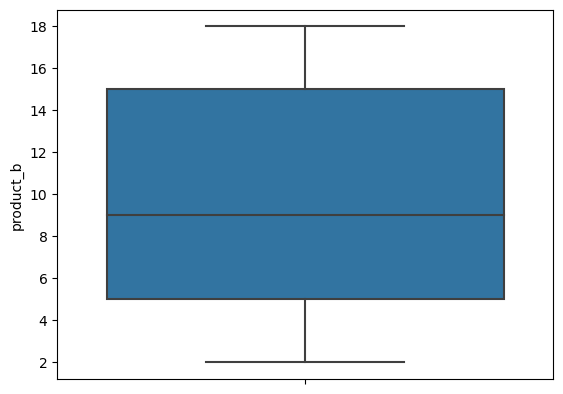

In [26]:
sns.boxplot(data=sales_data,y="product_b")

<AxesSubplot:ylabel='product_c'>

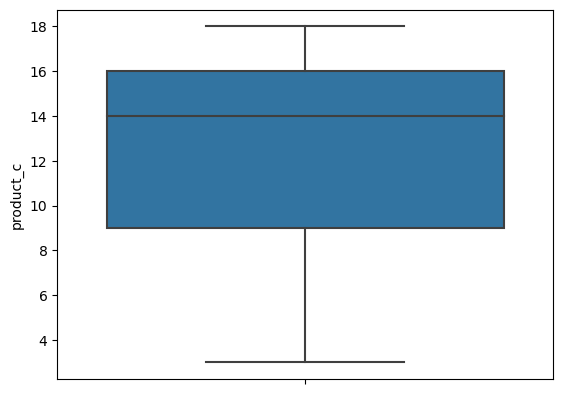

In [27]:
sns.boxplot(data=sales_data,y="product_c")

In [28]:
sales_data.fillna(sales_data["product_b"].mean(),inplace=True)

In [29]:
sales_data.fillna(sales_data["product_c"].mean(),inplace=True)

In [30]:
sales_data.isnull().sum()

userID              0
productID           0
gender              0
age_group           0
occupation          0
city                0
stayed_city_year    0
marital_stat        0
product_a           0
product_b           0
product_c           0
Purchase            0
dtype: int64

In [31]:
sales_data.describe()

,userID,occupation,marital_stat,product_a,product_b,product_c,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,10.699354,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.616983,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,9.842329,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,9.842329,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,9.842329,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Exploratory Data Analysis 
--

In [32]:
sales_data.corr() #Checking correlation between varibles

,userID,occupation,marital_stat,product_a,product_b,product_c,Purchase
userID,1.000000,-0.023971,0.020443,0.003825,0.001267,0.003195,0.004716
occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000317,0.011437,0.020833
marital_stat,0.020443,0.024280,1.000000,0.019888,0.012507,0.004747,-0.000463
product_a,0.003825,-0.007618,0.019888,1.000000,0.373686,-0.149631,-0.343703
product_b,0.001267,-0.000317,0.012507,0.373686,1.000000,0.048727,-0.179309
product_c,0.003195,0.011437,0.004747,-0.149631,0.048727,1.000000,0.145446
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.179309,0.145446,1.000000


Checkin duplicate values
--

In [33]:
sales_data.duplicated().sum()#  There are no duplicate values

0

In [34]:
sales_data = pd.get_dummies(sales_data,columns=["gender"])

In [35]:
sales_data

,userID,productID,age_group,occupation,city,stayed_city_year,marital_stat,product_a,product_b,product_c,Purchase,gender_F,gender_M
0,1000001,P00069042,0-17,10,A,2,0,3,9.842329,9.842329,8370,1,0
1,1000001,P00248942,0-17,10,A,2,0,1,6.000000,14.000000,15200,1,0
2,1000001,P00087842,0-17,10,A,2,0,12,9.842329,9.842329,1422,1,0
3,1000001,P00085442,0-17,10,A,2,0,12,14.000000,9.842329,1057,1,0
4,1000002,P00285442,55+,16,C,4+,0,8,9.842329,9.842329,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,51-55,13,B,1,1,20,9.842329,9.842329,368,0,1
550064,1006035,P00375436,26-35,1,C,3,0,20,9.842329,9.842329,371,1,0
550065,1006036,P00375436,26-35,15,B,4+,1,20,9.842329,9.842329,137,1,0
550066,1006038,P00375436,55+,1,C,2,0,20,9.842329,9.842329,365,1,0


In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
order = list(['0-17','18-25','26-35','36-45','46-50', '51-55','55+'])

In [38]:
oe = OrdinalEncoder(categories =[order])

In [39]:
sales_data[["age"]]= oe.fit_transform(sales_data[["age_group"]])

In [40]:
sales_data

,userID,productID,age_group,occupation,city,stayed_city_year,marital_stat,product_a,product_b,product_c,Purchase,gender_F,gender_M,age
0,1000001,P00069042,0-17,10,A,2,0,3,9.842329,9.842329,8370,1,0,0.0
1,1000001,P00248942,0-17,10,A,2,0,1,6.000000,14.000000,15200,1,0,0.0
2,1000001,P00087842,0-17,10,A,2,0,12,9.842329,9.842329,1422,1,0,0.0
3,1000001,P00085442,0-17,10,A,2,0,12,14.000000,9.842329,1057,1,0,0.0
4,1000002,P00285442,55+,16,C,4+,0,8,9.842329,9.842329,7969,0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,51-55,13,B,1,1,20,9.842329,9.842329,368,0,1,5.0
550064,1006035,P00375436,26-35,1,C,3,0,20,9.842329,9.842329,371,1,0,2.0
550065,1006036,P00375436,26-35,15,B,4+,1,20,9.842329,9.842329,137,1,0,2.0
550066,1006038,P00375436,55+,1,C,2,0,20,9.842329,9.842329,365,1,0,6.0


Dropping irrelevent columns
--

In [41]:
sales_data = sales_data.drop(["age_group"],axis=1)

In [42]:
sales_data = sales_data.drop(["stayed_city_year"],axis=1)

In [43]:
sales_data = sales_data.drop(["productID"],axis=1)

In [44]:
sales_data = sales_data.drop(["userID"],axis=1)

In [45]:
sales_data = sales_data.drop(["city"],axis=1)

In [46]:
sales_data

,occupation,marital_stat,product_a,product_b,product_c,Purchase,gender_F,gender_M,age
0,10,0,3,9.842329,9.842329,8370,1,0,0.0
1,10,0,1,6.000000,14.000000,15200,1,0,0.0
2,10,0,12,9.842329,9.842329,1422,1,0,0.0
3,10,0,12,14.000000,9.842329,1057,1,0,0.0
4,16,0,8,9.842329,9.842329,7969,0,1,6.0
...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.842329,9.842329,368,0,1,5.0
550064,1,0,20,9.842329,9.842329,371,1,0,2.0
550065,15,1,20,9.842329,9.842329,137,1,0,2.0
550066,1,0,20,9.842329,9.842329,365,1,0,6.0


In [47]:
sales_data.head()

,occupation,marital_stat,product_a,product_b,product_c,Purchase,gender_F,gender_M,age
0,10,0,3,9.842329,9.842329,8370,1,0,0.0
1,10,0,1,6.000000,14.000000,15200,1,0,0.0
2,10,0,12,9.842329,9.842329,1422,1,0,0.0
3,10,0,12,14.000000,9.842329,1057,1,0,0.0
4,16,0,8,9.842329,9.842329,7969,0,1,6.0


Data Analysis
--

1) Univariate Analysis

<AxesSubplot:xlabel='age', ylabel='count'>

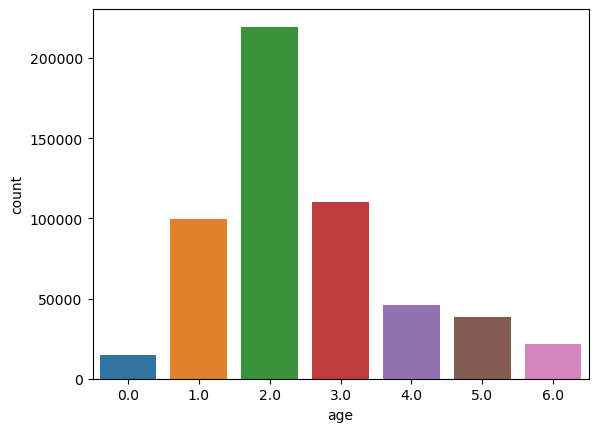

In [52]:
sns.countplot(x=sales_data["age"])

<AxesSubplot:xlabel='count', ylabel='gender_F'>

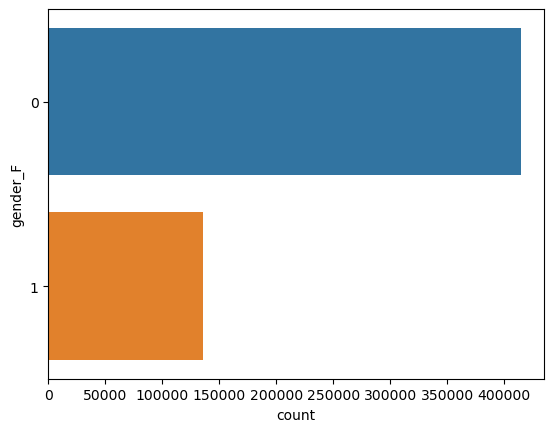

In [54]:
sns.countplot(y=sales_data["gender_F"])

<AxesSubplot:xlabel='count', ylabel='gender_M'>

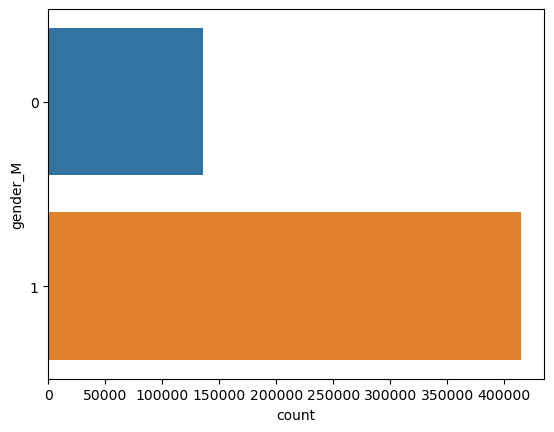

In [55]:
sns.countplot(y=sales_data["gender_M"])

2) Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='Purchase'>

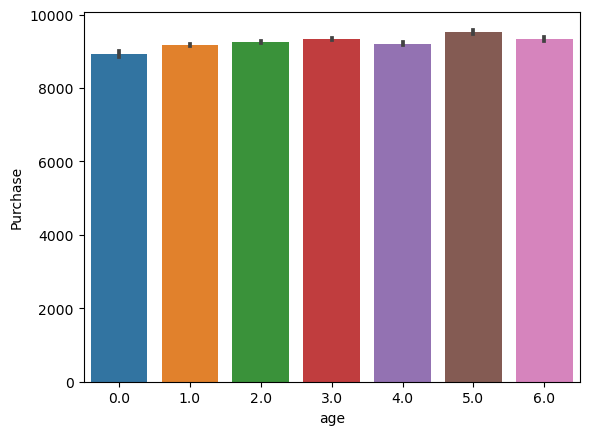

In [60]:
sns.barplot(data=sales_data, x="age", y="Purchase")

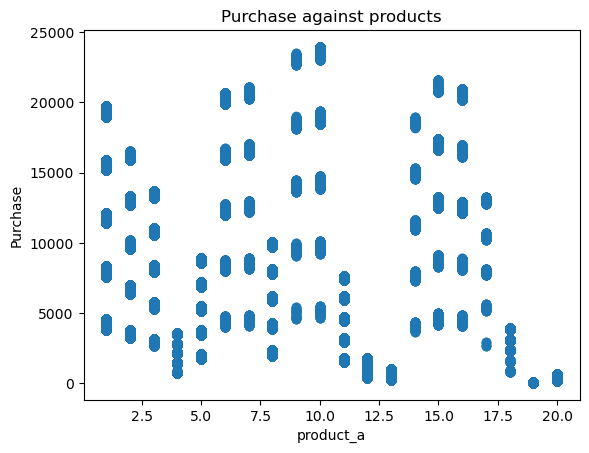

In [56]:
plt.scatter(sales_data["product_a"],sales_data["Purchase"])
plt.title("Purchase against products")
plt.xlabel("product_a")
plt.ylabel("Purchase")
plt.show()

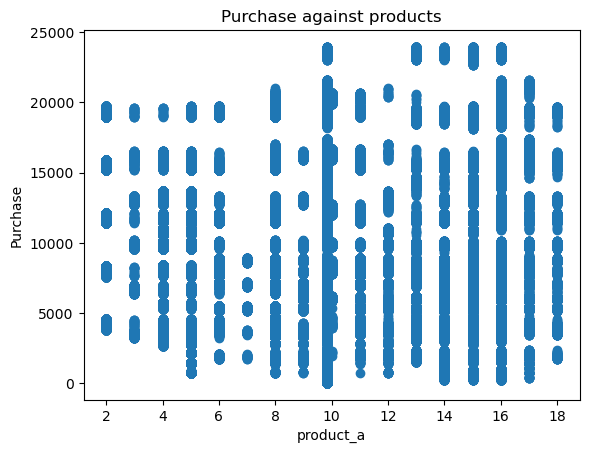

In [57]:
plt.scatter(sales_data["product_b"],sales_data["Purchase"])
plt.title("Purchase against products")
plt.xlabel("product_a")
plt.ylabel("Purchase")
plt.show()

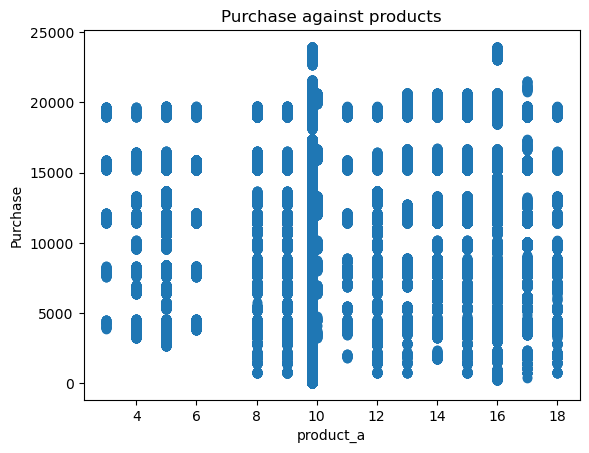

In [58]:
plt.scatter(sales_data["product_c"],sales_data["Purchase"])
plt.title("Purchase against products")
plt.xlabel("product_a")
plt.ylabel("Purchase")
plt.show()

<AxesSubplot:xlabel='gender_F', ylabel='Purchase'>

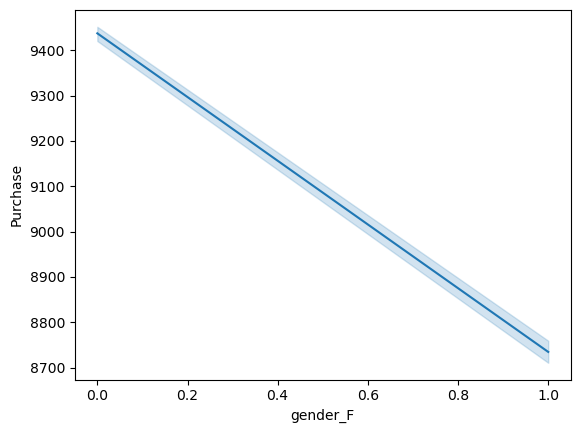

In [61]:
sns.lineplot(data=sales_data, x="gender_F", y="Purchase")

<AxesSubplot:xlabel='gender_M', ylabel='Purchase'>

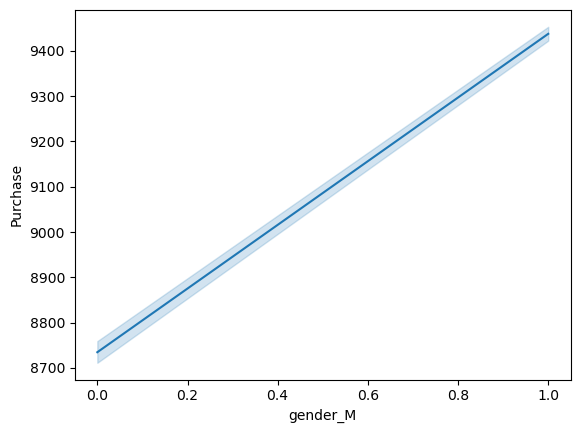

In [62]:
sns.lineplot(data=sales_data, x="gender_M", y="Purchase")

<AxesSubplot:xlabel='product_a', ylabel='Count'>

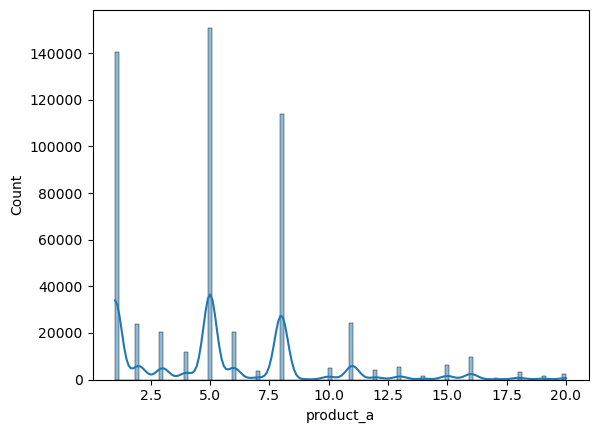

In [65]:
sns.histplot(data=sales_data, x="product_a", kde=True)

<AxesSubplot:xlabel='product_b', ylabel='Count'>

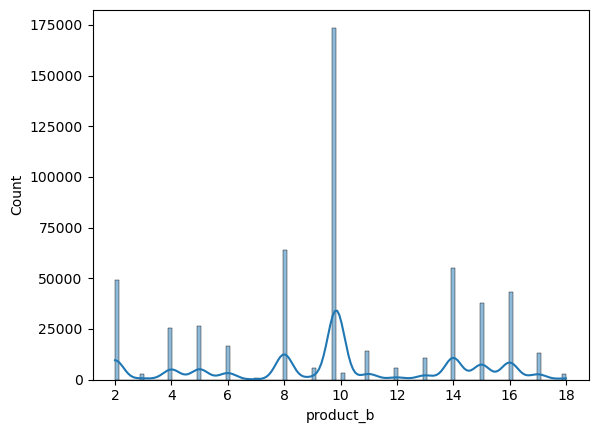

In [69]:
sns.histplot(data=sales_data, x="product_b", kde=True)

<AxesSubplot:xlabel='product_c', ylabel='Count'>

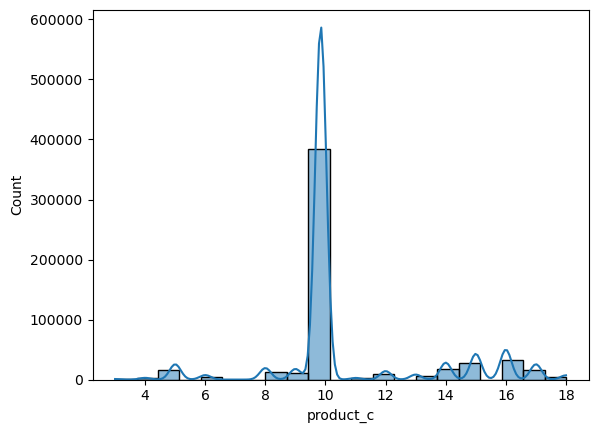

In [67]:
sns.histplot(data=sales_data, x="product_c", kde=True)